<a href="https://colab.research.google.com/github/lilihauser/hello-world/blob/master/Assignment_Lili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

For the first assignment, you will apply what you have learnt in the first labs. You have the opportunity to review and practice data cleaning and also SQL. The first dataset consists of data for loan applications at a bank. One row represents one past loan application, the features of the applicant and whether it was accepted or not. 

You will apply exploratory data analysis on it. You can use what you learnt previously from the first exercises. The methology behind this assignment is quite similar, but since the dataset is different you should sometimes adapt your code.

**Note: After your modifications the dataframe will change. You continue working on the modified version of the dataframe.**

### Important Notice : 
You are supposed to fill this notebook following the instructions (i.e. writing code in the cells with *#YOUR CODE HERE*). Your code should be able to provide the solution so that you can answer various questions posed in this notebook and in a Moodle Quiz. You'll be evaluated on both readability of the notebook and correctness of the answers given on Moodle.

So for this assignment you have to complete this notebook and then (you have to do BOTH!):

1. Submit your Python notebook here: https://moodle.unil.ch/mod/assign/view.php?id=787962
2. Answer the questions in this Moodle Quiz:
https://moodle.unil.ch/mod/quiz/view.php?id=786880 (you can only submit ONCE!)

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<br>
First, load the file from our github link in a Dataframe.

In [4]:
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/new_application_train_1.csv'
#YOUR CODE HERE
data = pd.read_csv(url)
#load the file in a dataframe
#use the head() command to get a feeling of the data and the columns
data.head()
#use the proper pandas command to find its dimensions
data.shape

(29213, 126)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29213 entries, 0 to 29212
Columns: 126 entries, Unnamed: 0 to LESS_USE
dtypes: float64(65), int64(45), object(16)
memory usage: 28.1+ MB


***Question 1 :***
<br>
How many rows and columns does the dataset have? (without including the header). 

Rows : 29'213
Columns : 126

<br>

The `'TARGET'` column indicates the people who have been given a loan (value of 0) and the ones who have not (value of 1). Using a barplot, show how many loans were given (TARGET=0) and how many were declined (TARGET=1).

**Hint:** Use *plot()* method on the result of *value_count()*

Text(0, 0.5, 'number of people')

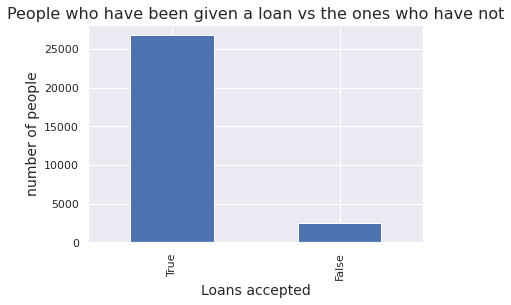

In [6]:
#YOUR CODE HERE
loan=pd.value_counts(data['TARGET']==0)
ax = loan.plot(kind="bar") 
ax.set_title("People who have been given a loan vs the ones who have not", size=16)
ax.set_xlabel("Loans accepted", size=14)
ax.set_ylabel("number of people", size=14)


***Question 2 :*** <br>
How many loans were accepted (TARGET = 0) vs declined (TARGET = 1)?

In [7]:
data_bar = data.groupby(['TARGET'])['Unnamed: 0'].count()
data_bar.head()

TARGET
0    26753
1     2460
Name: Unnamed: 0, dtype: int64

<br>

Use the *describe* method to get some summary statistics about `'DAYS_BIRTH'` and `'DAYS_EMPLOYED'` columns. Do you recognize some weird values ? In the `'DAYS_EMPLOYED'` column, if you plot the histogram, you should see that there are some very large values, distant from the rest of the values. Remove those very large values (eg all the values more than X, you have to decide on the X based on the histogram that you see). These values don't make sense for this column. Plot the histogram of `'DAYS_EMPLOYED'` before and after the removal of those large values and the transformation that we recommend below.
<br>


**Hint:** The values in those two columns are negative because they correspond to a difference in number of days since the beginning of employment or birth. The following transformation can be useful: 
- Taking the absolute value (*abs()*) since we want positive numbers


In [8]:
columns = ["DAYS_BIRTH", "DAYS_EMPLOYED"]
data[columns].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,29213.000000,29213.000000
mean,-16056.845001,63648.917331
std,4343.780979,141152.221072
min,-25196.000000,-16481.000000
25%,-19684.000000,-2800.000000
50%,-15805.000000,-1222.000000
75%,-12449.000000,-288.000000
max,-7680.000000,365243.000000


In [9]:
#YOUR CODE HERE
data[columns] = data[columns].abs()
data[columns].describe()
# do abs transformations
# use describe

,DAYS_BIRTH,DAYS_EMPLOYED
count,29213.000000,29213.000000
mean,16056.845001,67580.005682
std,4343.780979,139312.811196
min,7680.000000,2.000000
25%,12449.000000,940.000000
50%,15805.000000,2236.000000
75%,19684.000000,5732.000000
max,25196.000000,365243.000000


**Answer Note:** Those ages look reasonable. There are no outliers for the age on either the high or low end. Employed days doesn't look right! The maximum value is about 1000 years!

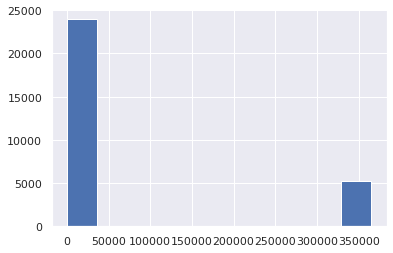

In [10]:
#YOUR CODE HERE
# do histogram of DAYS_EMPLOYED
data['DAYS_EMPLOYED'].hist()


,DAYS_EMPLOYED
count,23965.000000
mean,2395.970874
std,2347.353272
min,2.000000
25%,767.000000
50%,1656.000000
75%,3198.000000
max,16481.000000


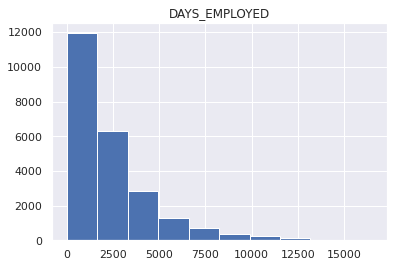

In [11]:
# YOUR CODE HERE
# remove the outliers from DAYS_EMPLOYED column
dropped_values = data[data.DAYS_EMPLOYED>50000].index
data= data.drop(index=dropped_values)
# show the histogram now
column = ["DAYS_EMPLOYED"]
data[column].hist()
#data["DAYS_EMPLOYED"].hist()
# use the describe on the new values
data[column].describe()
#data['DAYS_EMPLOYED'].describe()

***Question 3:*** <br>
After the removal of the outliers, what is the new mean value of `'DAYS_EMPLOYED'` column? (rounded to the nearest integer)

New mean : 2396 days

For each column, compute the number of missing entries and the percentage of the total rows in the column that it represents.

**Hint:** Consider summing the null values using the *isnull()* and *sum()* methods 

In [12]:
#YOUR CODE HERE 
#data.info(), data.isnull().sum()
# compute missing values for all columns
#data.dropna(inplace=True)
# compute percentage of missing values for all columns
    x = ['Column_Name','Missing_Data', 'Missing_Data_in_%']
    missing_data = pd.DataFrame(columns=x)
    columns = data.columns
    for col in columns:
        icolumn_name = col
        imissing_data = data[col].isnull().sum()
        imissing_in_percentage = (data[col].isnull().sum()/data[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data) 


                      Column_Name Missing_Data  Missing_Data_in_%
0                      Unnamed: 0            0           0.000000
1                    Unnamed: 0.1            0           0.000000
2                  Unnamed: 0.1.1            0           0.000000
3                      SK_ID_CURR            0           0.000000
4                          TARGET            0           0.000000
5              NAME_CONTRACT_TYPE            0           0.000000
6                     CODE_GENDER            0           0.000000
7                    FLAG_OWN_CAR            0           0.000000
8                 FLAG_OWN_REALTY            0           0.000000
9                    CNT_CHILDREN            0           0.000000
10               AMT_INCOME_TOTAL            0           0.000000
11                     AMT_CREDIT            0           0.000000
12                    AMT_ANNUITY            0           0.000000
13                AMT_GOODS_PRICE           25           0.104319
14        

***Question 4:*** <br>
What is the number of missing values for the column `'OWN_CAR_AGE'`? 

14'860

***Question 5:*** <br>
What is the percentage of missing values for the column `'COMMONAREA_MODE'`? (rounded to the nearest integer)

69%

Write some code to get the datatype (int64, float64...) of each column. For this just show the datatype of the columns as recognized by the default loading of the csv file (use command dtypes). Also count how many of each datatype you have.

In [13]:
#YOUR CODE HERE
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23965 entries, 1 to 29212
Columns: 126 entries, Unnamed: 0 to LESS_USE
dtypes: float64(65), int64(45), object(16)
memory usage: 23.2+ MB


***Question 6:*** <br>
How many variables are numeric continuous (ie, “float64”) ? 

65

***Question 7:*** <br>
How many variables are numeric discrete (ie, “int64”) ? 

45

***Question 8:*** <br>
How many variables are categorical (ie, “object”) ? 

16

Convert the column `'FLAG_CONT_MOBILE'` of our dataframe to a categorical variable.

In [0]:
#YOUR CODE HERE 
data['FLAG_CONT_MOBILE'] = pd.Categorical(data['FLAG_CONT_MOBILE'])

<br>

Remove the NULL values (use the dropna function) and plot the distribution of the `AMT_CREDIT` and the `AMT_GOODS_PRICE`.

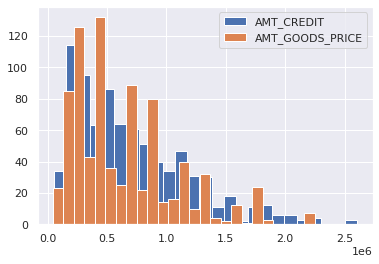

In [15]:
# drop null values
#YOUR CODE HERE
data_na = data.dropna()
# plot histogram 1
#YOUR CODE HERE
data_na['AMT_CREDIT'].hist(bins=25)
# plot histogram 2
#YOUR CODE HERE
data_na["AMT_GOODS_PRICE"].hist(bins=25)
#Label
plt.legend(['AMT_CREDIT','AMT_GOODS_PRICE'])

***Question 9:***<br>
What distribution does the `AMT_CREDIT` and the `AMT_GOODS_PRICE` histogram resemble?

- Gaussian
- Uniform
- None of the above


None of the above


Create a pie chart that shows proportion of different values in the column ``'NAME_INCOME_TYPE'`` (income sources of applicant's who applied for loan). You have to count the number of loans for each type and show are a pie chart.

**Hint:** Having a new Dataframe with the *index* and *values* of the result of *value_counts()* will make this plot easy

Text(0, 0.5, '')

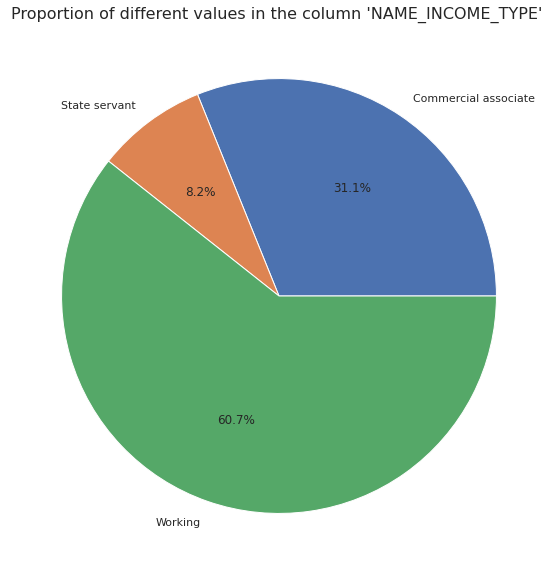

In [16]:
#YOUR CODE HERE
data_pie = data_na.groupby(["NAME_INCOME_TYPE"])["NAME_INCOME_TYPE"].count()
ax = data_pie.plot(kind="pie", figsize=(10,10), autopct="%1.1f%%")
ax.set_title("Proportion of different values in the column 'NAME_INCOME_TYPE' ", size=16)
ax.set_ylabel("")

***Question 10*** : <br>
What is the percentage of rows that had the value 'Commercial associate' in that column (rounded to the nearest integer, just the number of the percentage without the %, only an integer in the quiz)

31%

Select the rows where `'NAME_CONTRACT_TYPE'` is *Cash loans* and `'AMT_INCOME_TOTAL'` is bigger than 225000

In [17]:
#YOUR CODE HERE
#data[data['NAME_CONTRACT_TYPE']=='Cash loans'][data['AMT_INCOME_TOTAL']>225000].shape
data.loc[(data['AMT_INCOME_TOTAL'] > 225000) & (data['NAME_CONTRACT_TYPE'].str.match('Cash loans'))]


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LESS_USE
11,11,11,27354,131790,0,Cash loans,M,N,N,0,283500.0,808650.0,26086.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022800,13210,1073,-869.0,-2703,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,THURSDAY,7,0,0,0,0,0,0,Industry: type 4,0.330076,0.565274,0.199771,0.0278,0.0704,0.9851,0.7960,0.0057,0.0000,0.1034,0.0833,0.1250,0.0284,0.0227,0.0304,0.0000,0.0000,0.0284,0.0730,0.9851,0.8040,0.0057,0.0000,0.1034,0.0833,0.1250,0.0290,0.0248,0.0317,0.0000,0.0000,0.0281,0.0704,0.9851,0.7987,0.0057,0.00,0.1034,0.0833,0.1250,0.0289,0.0231,0.0309,0.0000,0.0000,reg oper account,block of flats,0.0239,"Stone, brick",No,1.0,0.0,1.0,0.0,-2233.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,999999
15,15,15,132164,253286,0,Cash loans,F,N,N,0,238500.0,263686.5,25816.5,238500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,Municipal apartment,0.020713,19989,1031,-9591.0,-3512,NaN,1,1,0,1,0,0,Sales staff,1.0,3,2,THURSDAY,7,0,0,0,0,0,0,Trade: type 7,NaN,0.661113,0.265049,0.0093,0.0000,0.9593,0.4424,0.0096,0.0000,0.0690,0.0417,0.0833,0.0000,0.0076,0.0097,0.0000,0.0000,0.0095,0.0000,0.9593,0.4642,0.0096,0.0000,0.0690,0.0417,0.0833,0.0000,0.0083,0.0101,0.0000,0.0000,0.0094,0.0000,0.9593,0.4499,0.0096,0.00,0.0690,0.0417,0.0833,0.0000,0.0077,0.0099,0.0000,0.0000,reg oper account,block of flats,0.0129,Wooden,Yes,1.0,0.0,1.0,0.0,-1600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,999999
26,26,26,230552,367051,0,Cash loans,F,Y,Y,1,279000.0,450000.0,22977.0,450000.0,Family,Working,Higher education,Civil marriage,House / apartment,0.019101,16187,3731,-9530.0,-4643,4.0,1,1,1,1,1,0,Managers,3.0,2,2,SATURDAY,13,0,0,0,0,0,0,Medicine,NaN,0.628690,NaN,NaN,N

***Question 11:*** <br>
How many rows satisfy a *Cash loans* contract and a *AMT total income* bigger than 225000?

In [18]:
#data.loc[(data['AMT_INCOME_TOTAL'] > 225000) & (data['NAME_CONTRACT_TYPE'].str.match('Cash loans'))].shape
data[(data['NAME_CONTRACT_TYPE']=='Cash loans') & (data['AMT_INCOME_TOTAL'] > 225000)].shape

(3718, 126)

3'718

Create a boxplot for the column `'FLOORSMAX_AVG'`

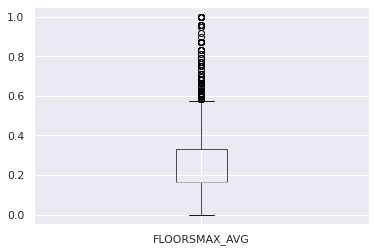

In [19]:
#YOUR CODE HERE
data.boxplot(column='FLOORSMAX_AVG')


***Question 12:*** <br>
From the box plot on `'FLOORSMAX_AVG'`, are there more outliers with small or with large values?

Large values

Compute the pearson correlation of all the features with respect to the ``'TARGET'`` variable. Notice that some of the correlations are NaN. Use the 'dropna()' function to remove those values. Plot the 20 most positively correlated variables/columns to 'TARGET'. Plot the 20 most negatively correlated variables/columns to 'TARGET'. Sort them and put them in a **bar chart** for example. 

**Hint:** *corr()* method can be applied to Dataframes

In [20]:
#YOUR CODE HERE
data_without_NaN=data.dropna()
data_without_NaN.corr(method='pearson')['TARGET'].sort_values(ascending = True)

EXT_SOURCE_3                   -0.198436
EXT_SOURCE_1                   -0.130036
EXT_SOURCE_2                   -0.118070
DAYS_EMPLOYED                  -0.081133
REGION_RATING_CLIENT           -0.078628
REGION_RATING_CLIENT_W_CITY    -0.073155
DAYS_BIRTH                     -0.056374
FLAG_DOCUMENT_13               -0.036662
FLOORSMIN_MEDI                 -0.034853
FLOORSMIN_AVG                  -0.034619
FLAG_DOCUMENT_5                -0.031060
LIVINGAREA_AVG                 -0.030241
LIVINGAREA_MEDI                -0.029538
ELEVATORS_AVG                  -0.028679
FLAG_DOCUMENT_16               -0.028536
FLOORSMIN_MODE                 -0.027723
NONLIVINGAPARTMENTS_AVG        -0.027647
ELEVATORS_MEDI                 -0.026484
NONLIVINGAPARTMENTS_MEDI       -0.026450
AMT_REQ_CREDIT_BUREAU_MON      -0.025646
NONLIVINGAPARTMENTS_MODE       -0.024717
AMT_REQ_CREDIT_BUREAU_HOUR     -0.024291
HOUR_APPR_PROCESS_START        -0.023838
ELEVATORS_MODE                 -0.023079
FLAG_DOCUMENT_18

***Question 13:*** <br>
What is the column with the highest positive correlation to the column ``'TARGET'`` (other than 'TARGET'!)?

The column is DAYS_LAST_PHONE_CHANGE

Text(0, 0.5, 'Column name')

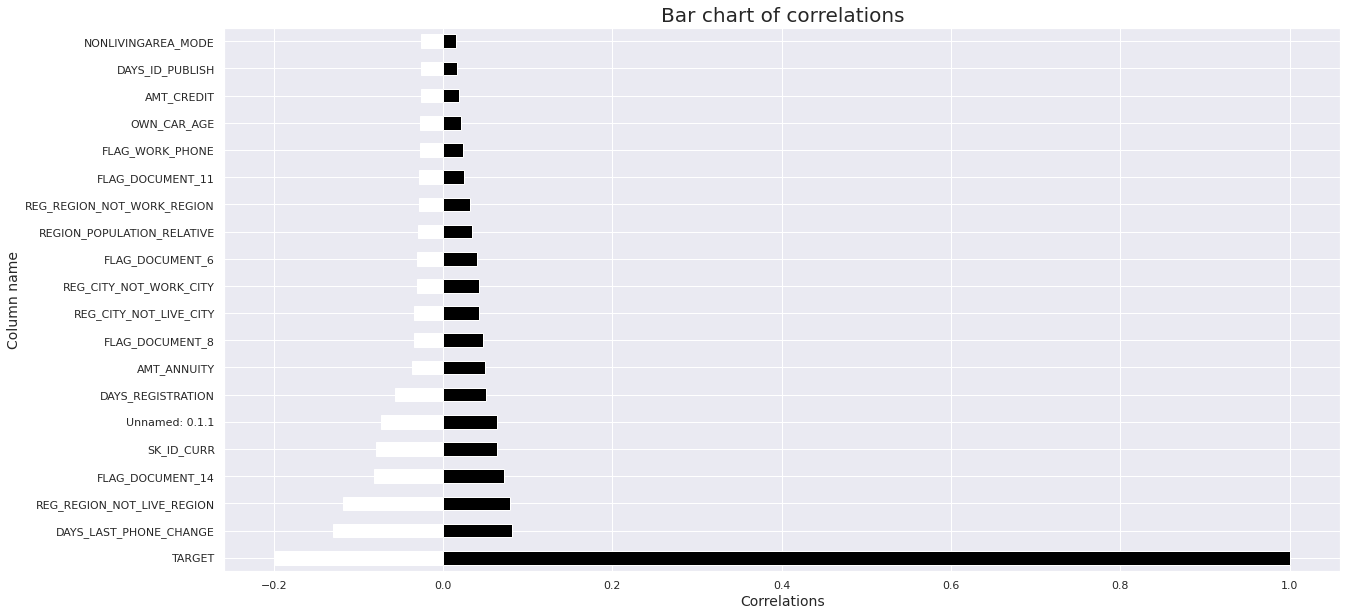

In [21]:
correlations = data_without_NaN[data_without_NaN.columns[0:]].corr(method='pearson')['TARGET'][:-1].dropna()
top20_positive = correlations.nlargest(20)
top20_negative = correlations.nsmallest(20)

graph = top20_negative.plot(kind="barh", color = 'white', figsize=(20,10))
graph2 = top20_positive.plot(kind="barh", color = 'black', figsize=(20,10))
graph.set_title("Bar chart of correlations", size=20)
graph.set_xlabel("Correlations", size=14)
graph.set_ylabel("Column name", size=14)

***Question 14:*** <br>
What is the column with the second highest positive correlation to the column ``'TARGET'``?

REG_REGION_NOT_LIVE_REGION

***Question 15:*** <br>
What is the column **least** correlated to the column ``'TARGET'``?

**Remember:** We are looking for correlation close to zero.

BASEMENTARE_MODE with 0.000072

Create a pairplot of columns `'LIVINGAPARTMENTS_AVG'`, `'APARTMENTS_MEDI'`, `'HOUR_APPR_PROCESS_START'` and `'REGION_RATING_CLIENT_W_CITY'`. Use the `'TARGET'` column as the *hue* argument

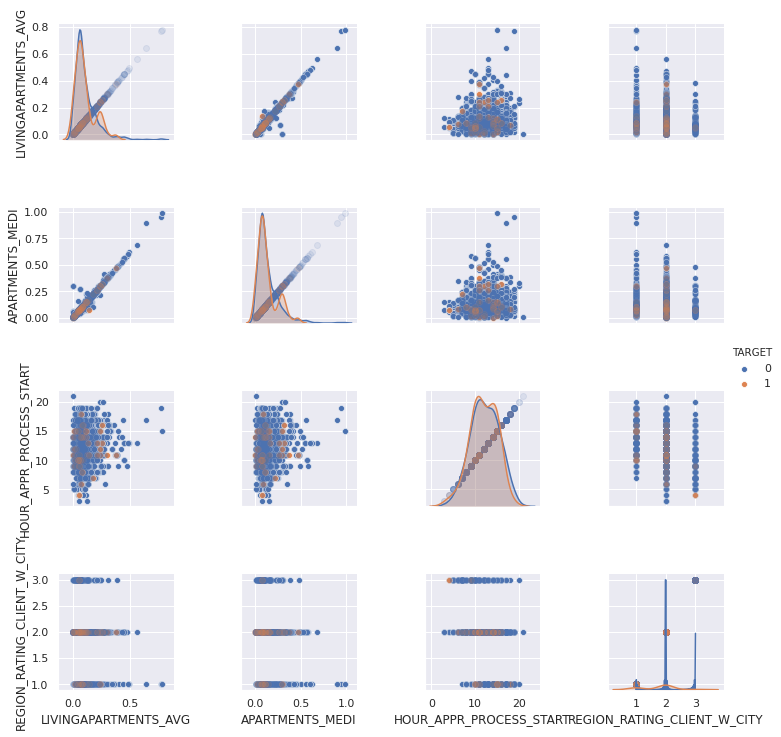

In [22]:
#YOUR CODE HERE
pg = sns.pairplot(data_without_NaN, vars=['LIVINGAPARTMENTS_AVG', 'APARTMENTS_MEDI', 'HOUR_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY'],hue='TARGET')
pg.map(plt.scatter, alpha=0.1)


***Question 16:***<br>
Among the above variables, what are the 2 variables that are the most correlated?

The variables are LIVINGAPARTMENTS_AVG and APARTMENTS_MEDI




Now, create a heatmap of correlations of columns `'DAYS_BIRTH'`, `'YEARS_BUILD_AVG'`, `'AMT_ANNUITY'` and `'TARGET'` 
 

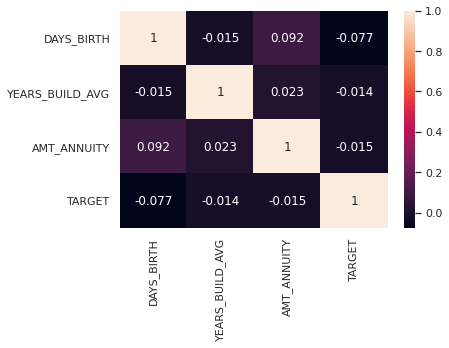

In [23]:
#YOUR CODE HERE
heat = ['DAYS_BIRTH', 'YEARS_BUILD_AVG', 'AMT_ANNUITY', 'TARGET']
sns.heatmap(data[heat].corr(), annot=True)

## SQL

Now you will test your knowledge of SQL with some statement. For this we will load the Titanic dataset which you also used in the lab. You have to answer the following questions.

In [0]:
# Load table from CSV file
import pandas as pd
from sqlalchemy import create_engine

# create the database
db = create_engine('sqlite://', echo=False)

# Titanic table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/week6%20-%20SQL2/data/Titanic.csv'
df = pd.read_csv(csvfile)
table_name = "Titanic"
df.to_sql(table_name, con=db) # populate it with the data

***Question 17:***<br>
Are there any pairs of passengers with the same last name where one is in first class and the other is in third class? If so, return the last name and the two first names. Label the first-name columns 'first' for the passenger in first class and 'third' for the passenger in third class.

In [25]:
query = """
select t1.last, t1.first as 'first', t2.first as 'third'
from titanic t1, titanic t2
where t1.last = t2.last
and t1.class = 1
and t2.class = 3
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,last,first,third
0,Allen,Miss Elisabeth Walton,Mr. William Henry
1,Smith,Mr. James Clinch,Mr. Thomas
2,Smith,Mr. Richard William,Mr. Thomas
3,Williams,Mr. Charles Duane,"Mr. Howard Hugh ""Harry"""
4,Flynn,"Mr. John Irwin (""Irving"")",Mr. James
5,Daly,Mr. Peter Denis,Mr. Eugene Patrick
6,Williams,Mr. Charles Duane,Mr. Leslie
7,Carlsson,Mr. Frans Olof,Mr. August Sigfrid
8,Flynn,"Mr. John Irwin (""Irving"")",Mr. John


***Question 18:***<br>
Which embarkation cities have more than 40 passengers whose age is missing? Reminder: Blanks in SQL tables are given a special value called 'null', and conditions 'A is null' and 'A is not null' can be used in Where clauses to check whether attribute A has the 'null' value.

In [26]:
query = """
Select embarked 
From Titanic 
group by embarked
having sum(age is null)>40
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,embarked
0,Queenstown
1,Southampton


***Question 19:***<br>
Find all classes where the average fare paid by passengers in that class was more than twice the overall average or less than half the overall average.

In [27]:
query = """
select avg(fare) as 'overall_average'
from Titanic
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,overall_average
0,32.204208


In [28]:
query = """
select class, avg(fare) as 'class_average'
from Titanic
group by class
having avg(fare) > 2 * (select avg(fare) from Titanic)
or avg(fare) < 0.5 * (select avg(fare) from Titanic)
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,class,class_average
0,1,84.154687
1,3,13.675550


***Question 20:***<br>
List each class and its survival rate, i.e., the fraction of passengers in that class who survived. Try to round the number to the 2nd decimal digit.

In [29]:
query = """
select class, sum(survived='yes') as survivals, (sum(survived='yes')+sum(survived='no')) as total,
round(1.00*sum(survived='yes')/(sum(survived='yes')+sum(survived='no')),2) as survival_rate
from Titanic
group by class
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,class,survivals,total,survival_rate
0,1,136,216,0.63
1,2,87,184,0.47
2,3,119,491,0.24
